In [1]:
import pandas as pd
import numpy as np

import urllib
from urllib.request import urlopen
import json
import requests
import matplotlib.pyplot as plt

In [2]:
def get_apple_link():
    """Get link of Apple Mobility Trends report file
    Returns:
        data_link (str): link of Apple Mobility Trends report file
        data_name (str): name of Apple Mobility Trends report file
    """
    # get link via API
    link = "https://covid19-static.cdn-apple.com/covid19-mobility-data/current/v3/index.json"
    with urlopen(link) as url:
        json_data = json.loads(url.read().decode())
        pass
    basePath = json_data["basePath"]
    csvPath = json_data["regions"]["en-us"]["csvPath"]
    file_link = ("https://covid19-static.cdn-apple.com" + basePath + csvPath)
    
    file_name = file_link.rsplit('/', 1)[-1]
    
    return file_link, file_name

In [3]:
data_link, data_name = get_apple_link()

In [4]:
urllib.request.urlretrieve(data_link, './' + data_name)

('./applemobilitytrends-2020-12-03.csv',
 <http.client.HTTPMessage at 0x110bed9d0>)

In [5]:
trends = pd.read_csv('./' + data_name, parse_dates = True, low_memory = False)
trends.head(5)

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,97.01,94.64,91.62,108.34,124.73,120.86,105.74,97.80,94.97,96.89
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,119.49,122.56,118.68,134.67,135.69,118.89,126.35,123.88,126.48,106.48
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,60.29,63.91,72.30,91.13,87.69,55.07,65.72,70.89,72.47,84.38
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,49.73,53.32,59.24,71.76,60.96,37.25,54.21,61.57,58.88,68.62
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,103.98,107.94,117.86,114.10,92.44,98.94,100.90,105.52,108.80,120.13


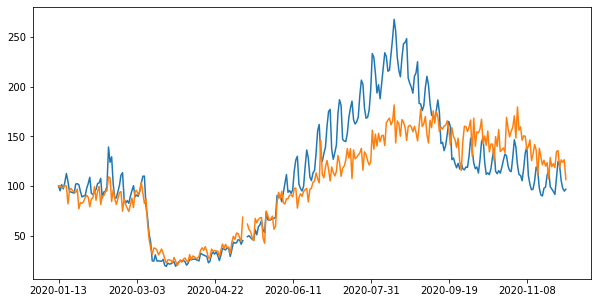

In [6]:
plt.figure(figsize = (10, 5))
trends.iloc[0, 6:].plot()
trends.iloc[1, 6:].plot()
plt.show()